# Advanced quantitative techniques - Class 3B - More Poisson

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
d = pd.read_csv("Data/GSS_2006.csv")

In [3]:
d.numwomen.describe()

count    2306.000000
mean        9.479185
std        62.054323
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       997.000000
Name: numwomen, dtype: float64

In [4]:
d.loc[d.numwomen<990, 'numwomen'].describe()

count    2298.000000
mean        6.049173
std        21.711985
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       500.000000
Name: numwomen, dtype: float64

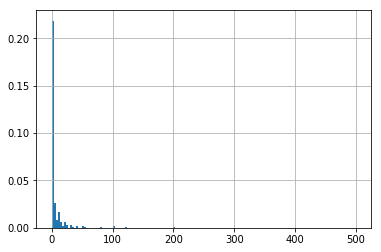

In [7]:
d.loc[d.numwomen<990, 'numwomen'].hist(bins=150, density=True)

## OLS model

In [9]:
# slide 4
from statsmodels.regression.linear_model import OLS

m1 = OLS.from_formula('numwomen ~ C(sex) + age + C(marital)', data=d, subset=d.numwomen<990).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numwomen   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     47.82
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           1.68e-55
Time:                        14:17:16   Log-Likelihood:                -10181.
No. Observations:                2294   AIC:                         2.038e+04
Df Residuals:                    2287   BIC:                         2.042e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.3950      1.713      6.069      0.000       7.036      13.754
C(sex)[T.2]         -14.0753      0.882    -15.951      0.000     -15.806     -12.345
C(marital)[T.2.0]     2.6561      1.778      1.494      0.135      -0.830       6.142
C(marital)[T.3.0]     5.8833      1.219      4.826      0.000       3.493       8.274
C(marital)[T.4.0]     5.7211      2.501      2.287      0.022       0.816      10.626
C(marital)[T.5.0]     2.9650      1.143      2.593      0.010       0.723       5.207
age                   0.0371      0.031      1.203      0.229      -0.023       0.098
==============================================================================
Omnibus:                     3872.344   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3501083.931
Skew:                          11.213   Prob(JB):                         0.00
Kurtosis:                     193.068   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
m1.predict(d[['sex', 'age', 'marital']]).describe()

count    4489.000000
mean        6.384656
std         7.274181
min        -2.975128
25%        -0.748272
50%         3.947417
75%        12.918769
max        19.433057
dtype: float64

## Poisson model

In [104]:
# slide 6
m3 = Poisson.from_formula('numwomen ~ C(sex) + age + C(marital)', data=d, subset=d.numwomen<990).fit()
m3.summary()

Optimization terminated successfully.
         Current function value: 6.724257
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numwomen   No. Observations:                 2294
Model:                        Poisson   Df Residuals:                     2287
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Aug 2018   Pseudo R-squ.:                  0.4263
Time:                        16:27:43   Log-Likelihood:                -15425.
converged:                       True   LL-Null:                       -26887.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8575      0.035     52.413      0.000       1.788       1.927
C(sex)[T.2]          -4.0259      0.054    -74.777      0.000      -4.131      -3.920
C(marital)[T.2.0]     0.6797      0.042     16.229      0.000       0.598       0.762
C(marital)[T.3.0]     0.9068      0.022     40.897      0.000       0.863       0.950
C(marital)[T.4.0]     0.9060      0.041     21.836      0.000       0.825       0.987
C(marital)[T.5.0]     0.5810      0.024     24.404      0.000       0.534       0.628
age                   0.0077      0.001     12.344      0.000       0.006       0.009
=====================================================================================
"""

In [106]:
np.exp(m3.fittedvalues).describe()

count    2294.000000
mean        6.054490
std         7.767452
min         0.133298
25%         0.203592
50%         0.406581
75%        10.708770
max        30.442875
dtype: float64

<br>
OLS did better than Poisson because the data is not Poisson-distributed

In [25]:
# variance of "numwomen"
d.loc[d.numwomen<990, 'numwomen'].var()

471.41029317765583

## Negative binomial

In [101]:
from statsmodels.discrete.discrete_model import NegativeBinomial
m6 = NegativeBinomial.from_formula('numwomen ~ C(sex) + age + C(marital)', data=d, subset=d.numwomen<990).fit()
m6.summary()

         Current function value: 1.808377
         Iterations: 35
         Function evaluations: 66
         Gradient evaluations: 66


/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               numwomen   No. Observations:                 2294
Model:               NegativeBinomial   Df Residuals:                     2287
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Aug 2018   Pseudo R-squ.:                  0.1592
Time:                        16:25:57   Log-Likelihood:                -4148.4
converged:                      False   LL-Null:                       -4934.1
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8244      0.159     11.475      0.000       1.513       2.136
C(sex)[T.2]          -4.0484      0.085    -47.606      0.000      -4.215      -3.882
C(marital)[T.2.0]     0.0708      0.173      0.410      0.682      -0.267       0.409
C(marital)[T.3.0]     0.7551      0.107      7.066      0.000       0.546       0.964
C(marital)[T.4.0]     1.4841      0.221      6.721      0.000       1.051       1.917
C(marital)[T.5.0]     0.9089      0.103      8.866      0.000       0.708       1.110
age                   0.0077      0.003      2.465      0.014       0.002       0.014
alpha                 2.0713      0.094     22.114      0.000       1.888       2.255
=====================================================================================
"""

In [102]:
np.exp(m6.fittedvalues).describe()

count    2294.000000
mean        6.407947
std         8.561061
min         0.126072
25%         0.182410
50%         0.361589
75%        10.274783
max        45.670934
dtype: float64

In [103]:
d.loc[d.numwomen<990, 'numwomen'].describe()

count    2298.000000
mean        6.049173
std        21.711985
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       500.000000
Name: numwomen, dtype: float64

### Poisson with offset

In [107]:
# slide 14
m5 = Poisson.from_formula('numwomen ~ C(sex) + C(marital)', data=d, subset=d.numwomen<990, 
      offset=np.log(d.loc[d.numwomen<990, 'age'])).fit()
m5.summary()

Optimization terminated successfully.
         Current function value: 6.742149
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numwomen   No. Observations:                 2294
Model:                        Poisson   Df Residuals:                     2288
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Aug 2018   Pseudo R-squ.:                  0.4337
Time:                        16:29:38   Log-Likelihood:                -15466.
converged:                       True   LL-Null:                       -27311.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6611      0.015   -109.229      0.000      -1.691      -1.631
C(sex)[T.2]          -4.0095      0.054    -74.474      0.000      -4.115      -3.904
C(marital)[T.2.0]     0.4783      0.040     12.006      0.000       0.400       0.556
C(marital)[T.3.0]     0.8968      0.022     40.447      0.000       0.853       0.940
C(marital)[T.4.0]     0.9519      0.041     22.995      0.000       0.871       1.033
C(marital)[T.5.0]     0.8476      0.022     39.418      0.000       0.805       0.890
=====================================================================================
"""

### Comparing fit

In [112]:
def augment(fit, data, y):
    df = data.copy()
    df['fitted'] = fit.fittedvalues
    df['absdiff'] = np.abs(df.fitted - df[y])
    return df

In [113]:
data = d[['sex', 'age', 'marital', 'numwomen']].copy()
data = data[data.numwomen<990]

a = augment(m1, data, 'numwomen')
b = augment(m3_2, data, 'numwomen')
c = augment(m6, data, 'numwomen')

In [114]:
pd.concat({'OLS': a.absdiff.describe(), 'Poisson': b.absdiff.describe(), 'Negative binomial': c.absdiff.describe()}, axis=1)

,Negative binomial,OLS,Poisson
count,2294.000000,2294.000000,2294.000000
mean,6.182420,7.239642,6.147733
std,21.043408,19.159904,21.054678
min,0.000527,0.009088,0.001911
25%,1.132093,1.674569,1.103455
50%,1.810584,2.826671,1.739205
75%,2.767926,8.966672,2.665649
max,497.561223,484.313760,496.918606
